In [ ]:
#подключение гуглдиска
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


 # **Работа с новым датасетом**

In [ ]:
import pandas as pd
nf = pd.read_csv('/content/drive/MyDrive/dataset.csv')
nf.head(20)

,date,number,name,rating,n_reviews,price
0,2021-02-01,1,Fire TV Stick 4K streaming device with Alexa V...,4.7,"512,797",$39.99
1,2021-02-01,2,"Amazon Smart Plug, works with Alexa – A Certif...",4.7,"328,652",$24.99
2,2021-02-01,3,Echo Show 5 -- Smart display with Alexa – stay...,4.6,"298,030",$44.99
3,2021-02-01,4,"All-new Echo Dot (4th Gen, 2020 release) | Sma...",4.7,"138,241",$44.99
4,2021-02-01,5,Roku Streaming Stick+ | HD/4K/HDR Streaming De...,4.7,"62,702",$39.00
5,2021-02-01,6,Roku Premiere | HD/4K/HDR Streaming Media Play...,4.7,"54,827",$24.99
6,2021-02-01,7,Roku Express | HD Streaming Media Player with ...,4.8,"81,724",$28.70
7,2021-02-01,8,"Fire 7 tablet (7"" display, 16 GB) - Black",4.4,"152,800",$49.99
8,2021-02-01,9,Kindle Paperwhite – Now Waterproof with more t...,4.6,"92,476",$129.99
9,2021-02-01,10,Wyze Cam 1080p HD Indoor WiFi Smart Home Camer...,4.5,"99,453",$25.98


In [ ]:
rty=nf.drop_duplicates(subset='name', ignore_index=True)
rty

,date,number,name,rating,n_reviews,price
0,2021-02-01,1,Fire TV Stick 4K streaming device with Alexa V...,4.7,"512,797",$39.99
1,2021-02-01,2,"Amazon Smart Plug, works with Alexa – A Certif...",4.7,"328,652",$24.99
2,2021-02-01,3,Echo Show 5 -- Smart display with Alexa – stay...,4.6,"298,030",$44.99
3,2021-02-01,4,"All-new Echo Dot (4th Gen, 2020 release) | Sma...",4.7,"138,241",$44.99
4,2021-02-01,5,Roku Streaming Stick+ | HD/4K/HDR Streaming De...,4.7,"62,702",$39.00
...,...,...,...,...,...,...
705,2021-07-28,87,Mini Spy Camera - 1080p Hidden Camera With Aud...,Not available,No customer reviews yet,$49.99
706,2021-07-28,97,Insignia NS-39DF310NA21 39-inch Smart HD 720p ...,4.6,"11,889",$189.99
707,2021-07-30,4,Telescope 70mm Aperture 500mm - for Kids & Adu...,5.0,1,$104.99
708,2021-07-30,44,Canon EOS REBEL T7 DSLR Camera|2 Lens Kit with...,4.8,938,$648.00


In [ ]:
#удаление товаров с неполными данными
t=rty.loc[rty.values == 'Not available'].index
rty=rty.drop(index=t)
rty.shape

(666, 6)

In [ ]:
rty.dtypes

date         object
number        int64
name         object
rating       object
n_reviews    object
price        object
dtype: object

In [ ]:
rty['rating']=rty['rating'].astype(float)

In [ ]:
rty['n_reviews']=rty['n_reviews'].str.replace(',',"")
rty['n_reviews']=rty['n_reviews'].astype(int)

In [ ]:
rty['price']=rty['price'].str.replace('$',"")

<ipython-input-27-547b30439d66>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rty['price']=rty['price'].str.replace('$',"")


In [ ]:
rty['price']=rty['price'].str.replace(',',"")

In [ ]:
rty['price']=rty['price'].astype(float)

In [ ]:
rty.isnull().sum()

date         0
number       0
name         0
rating       0
n_reviews    0
price        0
dtype: int64

In [ ]:
rty=rty.drop(columns=['date','number'])

In [ ]:
rty

,name,rating,n_reviews,price
0,Fire TV Stick 4K streaming device with Alexa V...,4.7,512797,39.99
1,"Amazon Smart Plug, works with Alexa – A Certif...",4.7,328652,24.99
2,Echo Show 5 -- Smart display with Alexa – stay...,4.6,298030,44.99
3,"All-new Echo Dot (4th Gen, 2020 release) | Sma...",4.7,138241,44.99
4,Roku Streaming Stick+ | HD/4K/HDR Streaming De...,4.7,62702,39.00
...,...,...,...,...
704,"Binoculars 20x50, HD Professional/Waterproof B...",5.0,5,65.99
706,Insignia NS-39DF310NA21 39-inch Smart HD 720p ...,4.6,11889,189.99
707,Telescope 70mm Aperture 500mm - for Kids & Adu...,5.0,1,104.99
708,Canon EOS REBEL T7 DSLR Camera|2 Lens Kit with...,4.8,938,648.00


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
q = rty["n_reviews"].quantile(0.1)

In [ ]:
#Фильтруем данные
rty=rty[rty["n_reviews"] > q]
#Обновляем индексы
rty=rty.reset_index(drop=True)

In [ ]:
rty

,name,rating,n_reviews,price
0,Fire TV Stick 4K streaming device with Alexa V...,4.7,512797,39.99
1,"Amazon Smart Plug, works with Alexa – A Certif...",4.7,328652,24.99
2,Echo Show 5 -- Smart display with Alexa – stay...,4.6,298030,44.99
3,"All-new Echo Dot (4th Gen, 2020 release) | Sma...",4.7,138241,44.99
4,Roku Streaming Stick+ | HD/4K/HDR Streaming De...,4.7,62702,39.00
...,...,...,...,...
594,"Power Strip with USB, TROND Surge Protector Fl...",4.8,2197,16.95
595,"12 Inch Zip Cable Ties (100 Pack), 50lbs Tensi...",4.8,9949,3.99
596,Tracki 2021 Model Mini Real time GPS Tracker. ...,4.2,19660,18.88
597,Insignia NS-39DF310NA21 39-inch Smart HD 720p ...,4.6,11889,189.99


In [ ]:
#Выполнить после "Создание категорий"
frames=[k,l,j,h,g,f,d,a,z,x,v,b,n,m,q,w]
result=pd.concat(frames, ignore_index=True)
result=result.sort_index(ascending=True)
result

,name,rating,n_reviews,price,category
0,"Amazon Smart Plug, works with Alexa – A Certif...",4.7,328652,24.99,Plug
1,"GE 6 Outlet Surge Protector, 10 Ft Extension C...",4.8,45304,14.00,Plug
2,"Power Strip with USB, TESSAN Mountable Flat Pl...",4.8,14399,18.99,Plug
3,"Surge Protector Wall Mount , Outlet Splitter w...",4.6,8847,15.98,Plug
4,"Power Strip with USB C, 3 Outlets 4 USB Ports ...",4.8,4594,17.99,Plug
...,...,...,...,...,...
390,"Garmin 010-02173-11 Venu, GPS Smartwatch with ...",4.6,3838,258.99,Monitor
391,HP M27ha FHD Monitor - Full HD Monitor (1920 x...,4.7,1164,248.97,Monitor
392,"Dell S2421HGF 24 Inch FHD TN, Anti-Glare Gamin...",4.8,3487,156.39,Monitor
393,"AOC C24G1A 24"" Curved Frameless Gaming Monitor...",4.7,10351,144.99,Monitor


In [ ]:
count_cat=result.groupby('category').count()
count_cat['name'].sort_values(ascending=False)

category
Camera           84
Tablet           83
Plug             41
TV               39
Smart Watch      32
Monitor          31
Smart Speaker    17
Nintendo         14
Laptop           13
Smart Display    10
Stick             7
Cable Clips       6
Media Player      6
Paperwhite        6
Sheets            3
Sound Bar         3
Name: name, dtype: int64

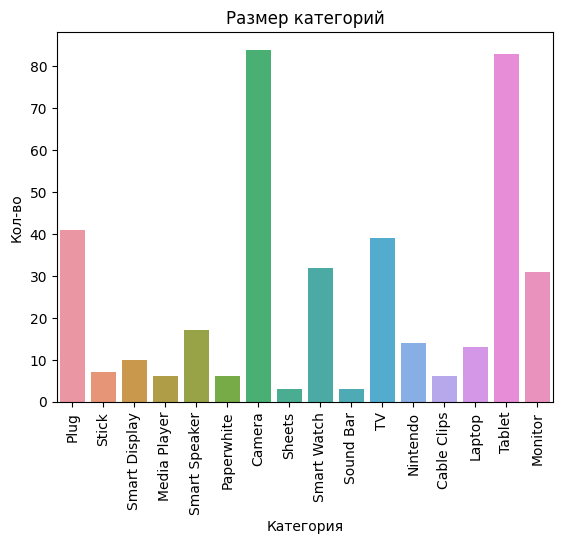

In [ ]:
sns.countplot(data=result, x="category" )

plt.xticks(rotation = 90)
plt.title("Размер категорий")
plt.xlabel("Категория")
plt.ylabel("Кол-во")
plt.show()

## Реализация косинусного сходства

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer = TfidfVectorizer()
matr = vectorizer.fit_transform(result['name'] + ' ' + result['category'])

In [ ]:
similarity_matrix = cosine_similarity(matr)

In [ ]:
kuk=pd.DataFrame()

In [ ]:
def get_similar_objects(object_id, similarity_matrix, n=5):
    sim_scores = list(enumerate(similarity_matrix[object_id]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:n+1]
    object_indices = [i[0] for i in sim_scores]
    return object_indices

In [ ]:
similar_objects = get_similar_objects(0, similarity_matrix)
print(similar_objects)

[25, 9, 8, 16, 66]


In [ ]:
similar_objects = get_similar_objects(269, similarity_matrix)
for i in similar_objects:
    kuk=kuk.append(result.loc[i])
kuk

<ipython-input-167-3cf852efcf54>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  kuk=kuk.append(result.loc[i])
<ipython-input-167-3cf852efcf54>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  kuk=kuk.append(result.loc[i])
<ipython-input-167-3cf852efcf54>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  kuk=kuk.append(result.loc[i])
<ipython-input-167-3cf852efcf54>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  kuk=kuk.append(result.loc[i])
<ipython-input-167-3cf852efcf54>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  kuk=kuk.append(result.loc

,name,rating,n_reviews,price,category
275,"300 PCS Stickers Pack (50-850Pcs/Pack), Colorf...",4.6,3960,13.89,Laptop
286,"300 PCS Stickers Pack (50-850Pcs/Pack), Colorf...",4.6,6424,12.24,Laptop
281,300 pcs Cool Random Stickers Vinyl Skateboard ...,4.5,2250,12.99,Laptop
278,"70 VSCO Stickers, Aesthetic Stickers, Cute Sti...",4.7,4737,4.99,Laptop
280,200 pcs Cool Random Stickers Vinyl Skateboard ...,4.5,2168,6.25,Laptop


In [ ]:
kuk.sort_values(by=['n_reviews'], ascending=False)

,name,rating,n_reviews,price,category
401,"AOC C24G1A 24"" Curved Frameless Gaming Monitor...",4.7,10351,144.99,Monitor
392,Dell 24 Inch PC Monitor SE2419Hx IPS Full HD (...,4.7,6584,174.00,Monitor
384,"Dell SE2419Hx 24"" IPS Full HD (1920x1080) Moni...",4.7,5526,129.98,Monitor
379,"LG 24M47VQ 24-Inch LED-lit Monitor, Black",4.7,3025,99.99,Monitor
387,"Dell S2421HGF 24inch FHD TN, Anti-Glare Gaming...",4.7,1882,205.99,Monitor


### Тестовый блок

In [ ]:
kuk=pd.DataFrame()

In [ ]:
result.loc[134]

name         Byakov Dash Cam, 1080P Dash Camera for Cars wi...
rating                                                     4.3
n_reviews                                                 2356
price                                                    30.35
category                                                Camera
Name: 134, dtype: object

In [ ]:
similar_objects = get_similar_objects(134, similarity_matrix)
for i in similar_objects:
    kuk=kuk.append(result.loc[i])
kuk

<ipython-input-211-5988acf42835>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  kuk=kuk.append(result.loc[i])
<ipython-input-211-5988acf42835>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  kuk=kuk.append(result.loc[i])
<ipython-input-211-5988acf42835>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  kuk=kuk.append(result.loc[i])
<ipython-input-211-5988acf42835>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  kuk=kuk.append(result.loc[i])
<ipython-input-211-5988acf42835>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  kuk=kuk.append(result.loc

,name,rating,n_reviews,price,category
91,APEMAN Dash Cam 1080P FHD DVR Car Driving Reco...,4.4,23430,44.99,Camera
102,Dash Cam Front and Rear CHORTAU Dual Dash Cam ...,4.3,10447,49.98,Camera
114,Rove R2- 4K Dash Cam Built in WiFi GPS Car Das...,4.5,9212,76.49,Camera
143,Rove R2-4K Dash Cam Built in WiFi GPS Car Dash...,4.5,10460,76.49,Camera
104,"Vantrue N4 3 Channel Dash Cam, 4K+1080P Dual C...",4.5,1537,249.99,Camera


## **Создание категорий**

In [ ]:
k=rty[rty['name'].str.contains('Plug')]
k["category"]="Plug"
k

<ipython-input-178-e03c8f6d7c1c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k["category"]="Plug"


,name,rating,n_reviews,price,category
1,"Amazon Smart Plug, works with Alexa – A Certif...",4.7,328652,24.99,Plug
12,"GE 6 Outlet Surge Protector, 10 Ft Extension C...",4.8,45304,14.00,Plug
34,"Power Strip with USB, TESSAN Mountable Flat Pl...",4.8,14399,18.99,Plug
63,"Surge Protector Wall Mount , Outlet Splitter w...",4.6,8847,15.98,Plug
78,"Power Strip with USB C, 3 Outlets 4 USB Ports ...",4.8,4594,17.99,Plug
80,"GE, White, 6 Outlet Surge Protector, 8 Ft Exte...",4.8,45304,10.04,Plug
88,"GE Power Strip Surge Protector, 6 Outlets, Fla...",4.7,3522,9.88,Plug
94,Anker Power Strip with USB PowerExtend USB 2 m...,4.8,8351,13.99,Plug
115,Gosund Smart Power Strip Work with Alexa Googl...,4.5,7498,19.99,Plug
129,Echo Flex - Plug-in mini smart speaker with Alexa,4.5,78743,14.99,Plug


In [ ]:
l=rty[(rty['name'].str.contains('Stick'))&(~rty['name'].str.contains('Stickers'))]
l["category"]="Stick"
l

<ipython-input-179-3baa59e6a1f0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  l["category"]="Stick"


,name,rating,n_reviews,price,category
0,Fire TV Stick 4K streaming device with Alexa V...,4.7,512797,39.99,Stick
4,Roku Streaming Stick+ | HD/4K/HDR Streaming De...,4.7,62702,39.00,Stick
45,Certified Refurbished Fire TV Stick 4K with Al...,4.6,10921,34.99,Stick
49,Ring Stick Up Cam Battery HD security camera w...,4.6,24990,99.99,Stick
142,Roku Streaming Stick plus | 4K/HDR/HD Streamin...,4.6,6106,41.99,Stick
170,"fire-Cable Plus Wireless Adapter, Powers Strea...",4.1,9037,5.00,Stick
487,Fire TV Stick 4K streaming device with Alexa V...,4.7,633972,39.99,Stick


In [ ]:
j=rty[(rty['name'].str.contains('Smart display'))|(rty['name'].str.contains('smart display'))]
j["category"]="Smart Display"
j

<ipython-input-180-3c524978247f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  j["category"]="Smart Display"


,name,rating,n_reviews,price,category
2,Echo Show 5 -- Smart display with Alexa – stay...,4.6,298030,44.99,Smart Display
25,Echo Show 8 -- HD smart display with Alexa – s...,4.8,163295,129.99,Smart Display
303,Echo Show 5 -- Smart display with Alexa – stay...,4.7,354657,49.99,Smart Display
312,Echo Show 8 -- HD smart display with Alexa – s...,4.8,196547,65.99,Smart Display
353,Certified Refurbished Echo Show 8 -- HD smart ...,4.7,1970,69.99,Smart Display
411,"Echo Show 5 (1st Gen, 2019 release) -- Smart d...",4.7,379464,43.99,Smart Display
413,"Echo Show 5 (1st Gen, 2019 release) -- Smart d...",4.7,379464,43.99,Smart Display
414,"Echo Show 8 (1st Gen, 2019 release) -- HD smar...",4.7,211725,69.99,Smart Display
454,"Echo Show 8 (1st Gen, 2019 release) -- HD smar...",4.7,215892,69.99,Smart Display
593,"Certified Refurbished Echo Show 5 (1st Gen, 20...",4.6,10820,49.99,Smart Display


In [ ]:
h=rty[rty['name'].str.contains('Media Player')]
h["category"]="Media Player"
h

<ipython-input-181-28a9b51d82fd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h["category"]="Media Player"


,name,rating,n_reviews,price,category
5,Roku Premiere | HD/4K/HDR Streaming Media Play...,4.7,54827,24.99,Media Player
6,Roku Express | HD Streaming Media Player with ...,4.8,81724,28.70,Media Player
21,Roku Ultra 2020 | Streaming Media Player HD/4K...,4.7,4780,79.00,Media Player
101,"Roku Smart Soundbar, 4K/HD/HDR Streaming Media...",4.6,2214,169.94,Media Player
271,Roku Streambar 4K/HD/HDR Streaming Media Playe...,4.6,1973,129.00,Media Player
421,Roku Express 4K+ 2021 | Streaming Media Player...,4.8,107256,39.99,Media Player


In [ ]:
g=rty[(rty['name'].str.contains('Smart speaker'))|(rty['name'].str.contains('smart speaker'))]
g["category"]="Smart Speaker"
g

<ipython-input-182-87d303e13947>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  g["category"]="Smart Speaker"


,name,rating,n_reviews,price,category
3,"All-new Echo Dot (4th Gen, 2020 release) | Sma...",4.7,138241,44.99,Smart Speaker
10,All-new Echo Dot (4th Gen) | Smart speaker wit...,4.8,29151,54.99,Smart Speaker
129,Echo Flex - Plug-in mini smart speaker with Alexa,4.5,78743,14.99,Smart Speaker
298,Echo Dot (3rd Gen) - Smart speaker with Alexa ...,4.7,1056552,29.99,Smart Speaker
300,All-new Echo Dot (4th Gen) | Smart speaker wit...,4.7,206691,30.79,Smart Speaker
301,Echo Dot (3rd Gen) - Smart speaker with Alexa ...,4.7,1056552,29.99,Smart Speaker
302,All-new Echo Dot (4th Gen) | Smart speaker wit...,4.7,206691,30.79,Smart Speaker
305,Echo Dot (3rd Gen) - Smart speaker with Alexa ...,4.7,1056552,29.99,Smart Speaker
306,Echo Dot (3rd Gen) - Smart speaker with Alexa ...,4.7,1056552,29.99,Smart Speaker
500,Echo Dot (4th Gen) | Smart speaker with Alexa ...,4.7,265471,24.99,Smart Speaker


In [ ]:
f=rty[rty['name'].str.contains('Paperwhite')]
f["category"]="Paperwhite"
f

<ipython-input-183-fe9ed670e389>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f["category"]="Paperwhite"


,name,rating,n_reviews,price,category
8,Kindle Paperwhite – Now Waterproof with more t...,4.6,92476,129.99,Paperwhite
138,Kindle Paperwhite Essentials Bundle including ...,4.8,4388,124.97,Paperwhite
315,Kindle Paperwhite – Now Waterproof with 2x the...,4.6,101258,76.70,Paperwhite
347,Certified Refurbished Kindle Paperwhite – Now ...,4.6,4082,69.99,Paperwhite
398,Kindle Paperwhite – Now Waterproof with more t...,4.6,105242,139.99,Paperwhite
580,Kindle Paperwhite – Now Waterproof with more t...,4.6,114262,89.99,Paperwhite


In [ ]:
d=rty[(rty['name'].str.contains('Cam'))|(rty['name'].str.contains('cam'))]
d["category"]="Camera"
d

<ipython-input-184-ff1dc00bfd40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d["category"]="Camera"


,name,rating,n_reviews,price,category
9,Wyze Cam 1080p HD Indoor WiFi Smart Home Camer...,4.5,99453,25.98,Camera
11,"All-new Blink Outdoor – wireless, weather-resi...",4.5,25166,85.49,Camera
24,Blink Mini – Compact indoor plug-in smart secu...,4.5,74000,33.24,Camera
36,Wyze Cam Pan 1080p Pan/Tilt/Zoom Wi-Fi Indoor ...,4.5,56726,37.95,Camera
37,APEMAN Dash Cam 1080P FHD DVR Car Driving Reco...,4.4,23430,44.99,Camera
...,...,...,...,...,...
568,"Security Camera Outdoor, IHOUMI 1080P WiFi Cam...",4.1,320,29.99,Camera
574,"Wyze Cam v3 with Color Night Vision, Wired 108...",4.6,11629,35.98,Camera
584,"Nooie Baby Monitor, WiFi Pet Camera Indoor, 36...",4.2,10921,49.99,Camera
586,"Security Camera Outdoor, Wireless WiFi IP Came...",4.2,1469,49.99,Camera


In [ ]:
a=rty[(rty['name'].str.contains('Sheets'))]
a["category"]="Sheets"
a

<ipython-input-185-db0c94b3f7dc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a["category"]="Sheets"


,name,rating,n_reviews,price,category
13,"Fujifilm Instax Mini Instant Film, 10 Sheets×5...",4.8,28884,34.97,Sheets
68,Fujifilm INSTAX Mini Instant Film 2 Pack = 20 ...,4.7,14459,15.99,Sheets
269,Fujifilm InstaX Mini Instant Film Rainbow & St...,4.8,10425,31.00,Sheets


In [ ]:
q=rty[(rty['name'].str.contains('Tablet'))|(rty['name'].str.contains('tablet'))|(rty['name'].str.contains('iPad'))]
q["category"]="Tablet"
q

<ipython-input-186-b5874a53d525>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q["category"]="Tablet"


,name,rating,n_reviews,price,category
7,"Fire 7 tablet (7"" display, 16 GB) - Black",4.4,152800,49.99,Tablet
16,"Apple iPad Mini (Wi-Fi, 64GB) - Space Gray (La...",4.8,12129,384.99,Tablet
19,"New Apple iPad (10.2-inch, Wi-Fi, 32GB) - Spac...",4.9,22062,299.00,Tablet
22,"Fire HD 8 tablet, 8"" HD display, 32 GB, design...",4.6,71527,89.99,Tablet
30,"Fire 7 Kids Edition Tablet, 7"" Display, 16 GB,...",4.6,143558,99.99,Tablet
...,...,...,...,...,...
537,"Fire HD 8 tablet, 8"" HD display, 32 GB, latest...",4.6,99898,104.99,Tablet
569,"2021 Apple 12.9-inch iPad Pro (Wi‑Fi, 128GB) -...",4.8,389,1011.08,Tablet
571,"Introducing Fire HD 10 Kids Pro tablet, 10.1"",...",4.8,511,129.99,Tablet
577,"Power Strip, AHRISE Extension Cord with 6 AC O...",4.7,4669,13.94,Tablet


In [ ]:
m=rty[((rty['name'].str.contains('Laptop'))|(rty['name'].str.contains('laptop')))&(~rty['name'].str.contains('Stickers'))]
m["category"]="Laptop"
m

<ipython-input-187-f8852cfa3fb7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m["category"]="Laptop"


,name,rating,n_reviews,price,category
42,"Acer Aspire 5 Slim Laptop, 15.6 inches Full HD...",4.6,23983,364.99,Laptop
123,ASUS F512JA-AS34 VivoBook 15 Thin and Light La...,4.5,3246,462.99,Laptop
125,"ASUS Laptop L210 Ultra Thin Laptop, 11.6” HD D...",4.3,5373,235.00,Laptop
166,"havit HV-F2056 15.6""-17"" Laptop Cooler Cooling...",4.5,23104,18.68,Laptop
204,"HP Chromebook 14-inch HD Laptop, Intel Celeron...",4.6,3399,211.18,Laptop
255,"HP Chromebook 14-inch HD Laptop, Intel Celeron...",4.5,3282,229.99,Laptop
341,"Lenovo Flex 5 14"" 2-in-1 Laptop, 14.0"" FHD (19...",4.4,3870,729.00,Laptop
381,"Acer Nitro 5 Gaming Laptop, 9th Gen Intel Core...",4.7,2894,649.99,Laptop
446,"USB Hub 3.0 Splitter,7 Port USB Data Hub with ...",4.3,4077,16.99,Laptop
523,"Acer Chromebook Spin 311 Convertible Laptop, I...",4.6,6655,224.99,Laptop


In [ ]:
n=rty[(rty['name'].str.contains('Cable Clips'))]
n["category"]="Cable Clips"
n

<ipython-input-188-1eb12903e869>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n["category"]="Cable Clips"


,name,rating,n_reviews,price,category
18,"OHill Cable Clips, 16 Pack Black Cord Organize...",4.5,23467,7.99,Cable Clips
102,Cable Clips - Cord Organizer - Cable Managemen...,4.3,12934,7.97,Cable Clips
246,50pcs Upgraded Cable Clips with Strong Adhesiv...,4.5,24399,6.79,Cable Clips
349,"INCHOR Cord Organizer, Cable Clips Cord Holder...",4.6,1795,6.99,Cable Clips
361,"Cable Clips, OHill 16 Pack Black Adhesive Cord...",4.5,29812,10.99,Cable Clips
387,"OHill Cable Clips,16 Pack Black Adhesive Cord ...",4.5,30729,7.99,Cable Clips


In [ ]:
b=rty[(rty['name'].str.contains('Nintendo'))]
b["category"]="Nintendo"
b

<ipython-input-189-25ad329bcb0d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b["category"]="Nintendo"


,name,rating,n_reviews,price,category
23,Just Dance 2021 - Nintendo Switch Standard Edi...,4.8,10643,29.88,Nintendo
28,amFilm Tempered Glass Screen Protector for Nin...,4.8,70062,6.79,Nintendo
32,Nintendo Switch with Neon Blue and Neon Red Jo...,4.9,58462,369.99,Nintendo
40,Carnival Games Nintendo Switch,4.4,11679,14.99,Nintendo
55,Nintendo Switch AC Adapter,4.8,7001,26.88,Nintendo
114,Orzly Carry Case Compatible with Nintendo Swit...,4.8,40664,12.71,Nintendo
120,Nintendo Switch - Animal Crossing: New Horizon...,4.9,59683,299.99,Nintendo
141,Nintendo Neon Purple/ Neon Orange Joy-Con (L-R...,4.8,51992,79.99,Nintendo
146,Nintendo Joy-Con (L/R) - Neon Pink / Neon Green,4.8,52195,79.99,Nintendo
154,Nintendo Switch - Mario Red & Blue Edition - S...,4.9,62494,383.98,Nintendo


In [ ]:
v=rty[(rty['name'].str.contains('TV'))&(~rty['name'].str.contains('Stick'))&(~rty['name'].str.contains('Bar'))&(~rty['name'].str.contains('App'))&(~rty['name'].str.contains('Media Player'))]
v["category"]="TV"
v

<ipython-input-190-f51422f9468c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v["category"]="TV"


,name,rating,n_reviews,price,category
50,"TCL 32"" 3-Series 720p Roku Smart TV - 32S335",4.6,40058,128.00,TV
53,Fire TV Cube | Hands-free streaming device wit...,4.6,36927,104.99,TV
66,"TCL 4K Smart LED TV, 50"" (50S435)",4.6,1830,299.99,TV
70,Insignia NS-32DF310NA19 32-inch Smart HD TV - ...,4.7,29360,139.99,TV
103,All-New Insignia NS-24DF310NA21 24-inch Smart ...,4.6,4684,99.99,TV
105,All-New Insignia NS-43DF710NA21 43-inch Smart ...,4.6,9068,249.99,TV
107,All-New Toshiba 32LF221U21 32-inch Smart HD 72...,4.7,11894,149.99,TV
136,All-New Insignia NS-39DF310NA21 39-inch Smart ...,4.6,5005,169.99,TV
159,DVD Player for TV All Region Free DVD Player w...,4.3,1401,29.99,TV
163,All-New Toshiba 50LF621U21 50-inch Smart 4K UH...,4.6,6024,319.99,TV


In [ ]:
x=rty[(rty['name'].str.contains('Sound Bar'))]
x["category"]="Sound Bar"
x

<ipython-input-191-629d6035aae2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["category"]="Sound Bar"


,name,rating,n_reviews,price,category
54,Majority Bowfell Small Sound Bar for TV with B...,4.2,3493,36.95,Sound Bar
238,TCL Alto 3 2.0 Channel Home Theater Sound Bar ...,4.4,1330,59.99,Sound Bar
589,"Soundbar, KMOUK TV Sound Bar, Bluetooth 5.0, S...",4.3,579,59.99,Sound Bar


In [ ]:
w=rty[(rty['name'].str.contains('Monitor'))&(~rty['name'].str.contains('Cam'))]
w["category"]="Monitor"
w

<ipython-input-192-bd73c6b5b736>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  w["category"]="Monitor"


,name,rating,n_reviews,price,category
14,HP 24mh FHD Monitor - Computer Monitor with 23...,4.7,7488,109.99,Monitor
26,Acer SB220Q bi 21.5 Inches Full HD (1920 x 108...,4.7,26128,93.99,Monitor
65,"Sceptre 20"" 1600x900 75Hz Ultra Thin LED Monit...",4.5,12502,79.97,Monitor
74,HP VH240a 23.8-Inch Full HD 1080p IPS LED Moni...,4.7,19433,124.99,Monitor
86,Dell 27 LED backlit LCD Monitor SE2719H IPS Fu...,4.7,5752,149.98,Monitor
145,SAMSUNG LC27F398FWNXZA SAMSUNG C27F398 27 Inch...,4.7,4997,159.99,Monitor
173,"SAMSUNG LC24F396FHNXZA 23.5"" FHD Curved LED-Li...",4.7,4034,129.99,Monitor
174,"LG 24M47VQ 24-Inch LED-lit Monitor, Black",4.7,3025,99.99,Monitor
185,"Sceptre Curved 27"" 75Hz LED Monitor HDMI VGA B...",4.7,5701,166.99,Monitor
206,"Samsung Galaxy Watch 3 (45mm, GPS, Bluetooth) ...",4.7,5281,279.00,Monitor


In [ ]:
z=rty[(rty['name'].str.contains('Apple Watch'))|(rty['name'].str.contains('Smart Watch'))|(rty['name'].str.contains('Smartwatch'))]
z["category"]="Smart Watch"
z

<ipython-input-193-ce3ae4e592b7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z["category"]="Smart Watch"


,name,rating,n_reviews,price,category
31,"Apple Watch Series 3 (GPS, 38mm) - Silver Alum...",4.8,105809,169.00,Smart Watch
35,"Apple Watch Series 3 (GPS, 38mm) - Space Gray ...",4.8,105809,169.00,Smart Watch
44,Fitbit Versa 2 Health and Fitness Smartwatch w...,4.6,87036,148.95,Smart Watch
60,Willful Smart Watch for Android Phones and iOS...,4.3,27841,35.99,Smart Watch
96,"New Apple Watch Series 6 (GPS, 44mm) - Space G...",4.8,19268,379.98,Smart Watch
97,"Apple Watch Series 3 (GPS, 38mm) - Space Gray ...",4.8,106212,169.00,Smart Watch
98,"New Apple Watch Series 6 (GPS, 44mm) - Gold Al...",4.8,19268,473.94,Smart Watch
99,"New Apple Watch Series 6 (GPS, 40mm) - Gold Al...",4.8,19268,349.98,Smart Watch
108,"Apple Watch Series 3 (GPS, 42mm) - Space Gray ...",4.8,106212,199.00,Smart Watch
111,"New Apple Watch Series 6 (GPS, 44mm) - Silver ...",4.8,19700,379.98,Smart Watch
